In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_excel('ECOMMDATA.xlsx')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
total_sales = data['Sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 12642501.909880001


In [6]:
# Convert 'Order Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [7]:
# Extract month and year from 'Order Date' for analysis
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

In [12]:
# Sales Trends Over Time
sales_over_time = data.groupby(['Year', 'Month'])['Sales'].sum()
print("\nSales Trends Over Time:")
print(pd.DataFrame(sales_over_time))
                           


Sales Trends Over Time:
                   Sales
Year Month              
2011 1       98898.48886
     2       91152.15698
     3      145729.36736
     4      116915.76418
     5      146747.83610
     6      215207.38022
     7      115510.41912
     8      207581.49122
     9      290214.45534
     10     199071.26404
     11     298496.53752
     12     333925.73460
2012 1      135780.72024
     2      100510.21698
     3      163076.77116
     4      161052.26952
     5      208364.89124
     6      256175.69842
     7      145236.78512
     8      303142.94238
     9      289389.16564
     10     252939.85020
     11     323512.41690
     12     338256.96660
2013 1      199185.90738
     2      167239.65040
     3      198594.03012
     4      177821.31684
     5      260498.56470
     6      396519.61190
     7      229928.95200
     8      326488.78936
     9      376619.24568
     10     293406.64288
     11     373989.36010
     12     405454.37802
2014 1      241268.55566


In [14]:
# Best-selling Products
best_selling_products = data.groupby('Product Name')['Sales'].sum().nlargest(10)
print("\nBest-selling Products:")
print(pd.DataFrame(best_selling_products))


Best-selling Products:
                                                         Sales
Product Name                                                  
Apple Smart Phone, Full Size                        86935.7786
Cisco Smart Phone, Full Size                        76441.5306
Motorola Smart Phone, Full Size                     73156.3030
Nokia Smart Phone, Full Size                        71904.5555
Canon imageCLASS 2200 Advanced Copier               61599.8240
Hon Executive Leather Armchair, Adjustable          58193.4841
Office Star Executive Leather Armchair, Adjustable  50661.6840
Harbour Creations Executive Leather Armchair, A...  50121.5160
Samsung Smart Phone, Cordless                       48653.4600
Nokia Smart Phone, with Caller ID                   47877.7857


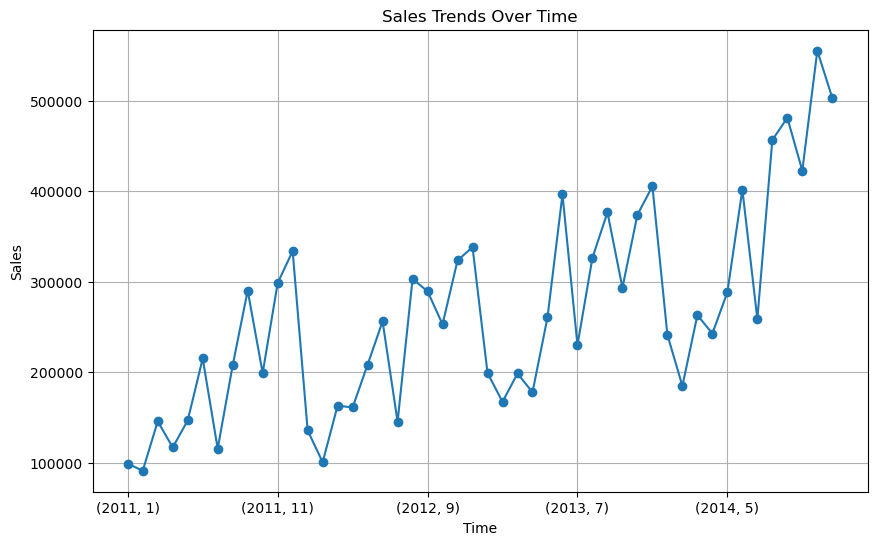

In [15]:
# Sales Trend Graph
plt.figure(figsize=(10, 6))
sales_over_time.plot(kind='line', marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

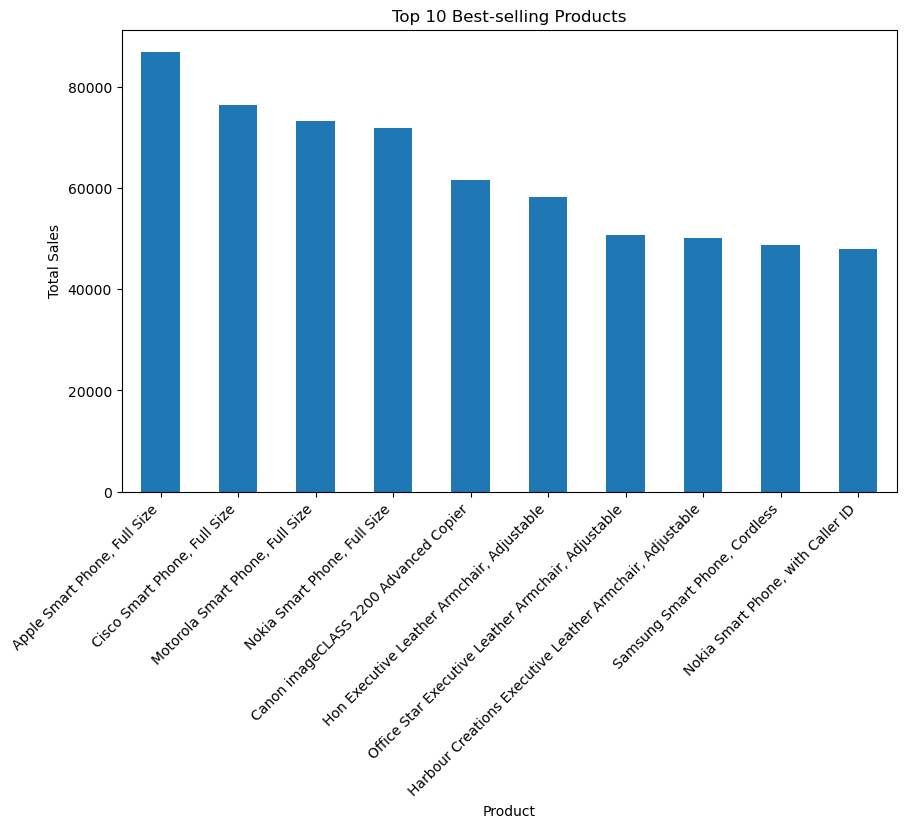

In [16]:
# Best-selling Products Chart
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar')
plt.title('Top 10 Best-selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
# Customer Segmentation
customer_segmentation = data.groupby('Segment')['Sales'].sum()
print("\nCustomer Segmentation:")
print(customer_segmentation)


Customer Segmentation:
Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64


Text(0, 0.5, '')

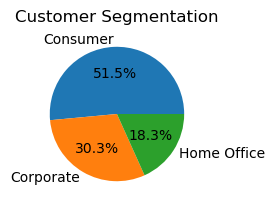

In [18]:
# Customer Segmentation Chart
plt.subplot(2, 2, 3)
customer_segmentation.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.ylabel('')

In [25]:
# Discount Analysis
discount_analysis = data.groupby('Discount')['Sales'].sum()
print("\nDiscount Analysis:")
discount_analysis = discount_analysis.round(2)
print(pd.DataFrame(discount_analysis))


Discount Analysis:
               Sales
Discount            
0.000     6992410.95
0.002      261395.62
0.070      121616.85
0.100     1579606.37
0.150      306029.84
0.170      247399.20
0.200     1203832.29
0.202       16215.65
0.250       88055.35
0.270       89351.67
0.300      188932.02
0.320       14493.46
0.350       95706.49
0.370       31618.02
0.400      559525.16
0.402       33733.87
0.450       33391.13
0.470       83432.17
0.500      324131.14
0.550        6308.66
0.570        8144.80
0.600      184581.87
0.602        4977.18
0.650        6579.81
0.700      139772.17
0.800       20463.33
0.850         796.84


Text(0, 0.5, 'Total Sales')

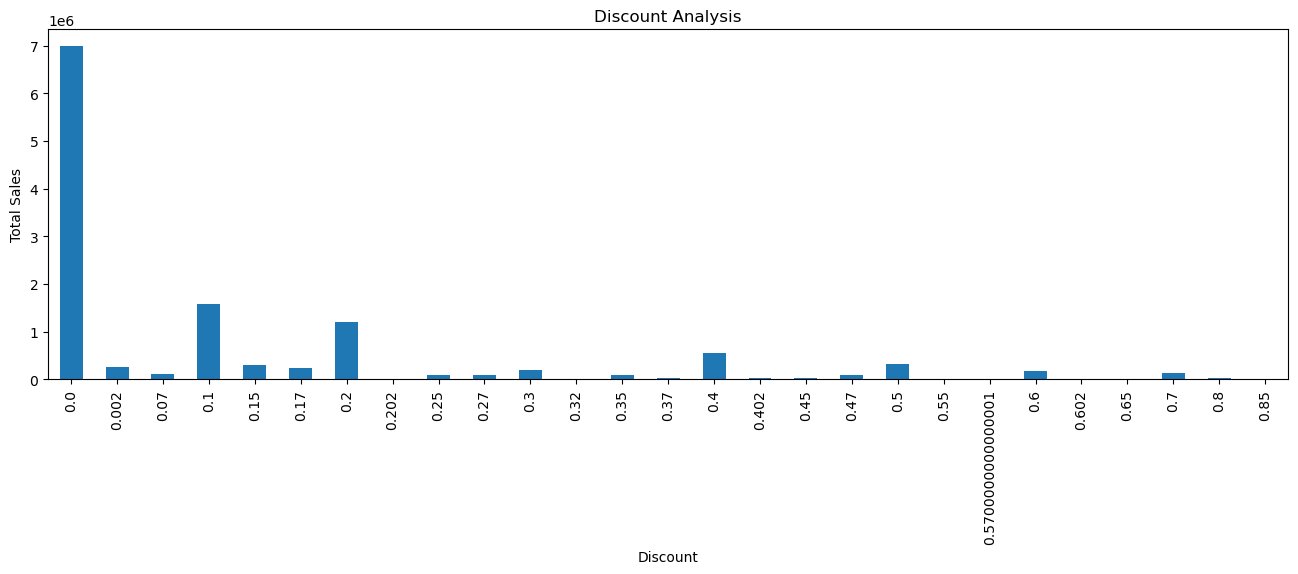

In [26]:
# Discount Analysis Chart
plt.figure(figsize=(16, 10))  # Increase figure size
plt.subplot(2, 1, 2)
discount_analysis.plot(kind='bar')
plt.title('Discount Analysis')
plt.xlabel('Discount')
plt.ylabel('Total Sales')



In [28]:
# Order Priority Analysis
order_priority_counts = data['Order Priority'].value_counts()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Medium'),
  Text(1, 0, 'High'),
  Text(2, 0, 'Critical'),
  Text(3, 0, 'Low')])

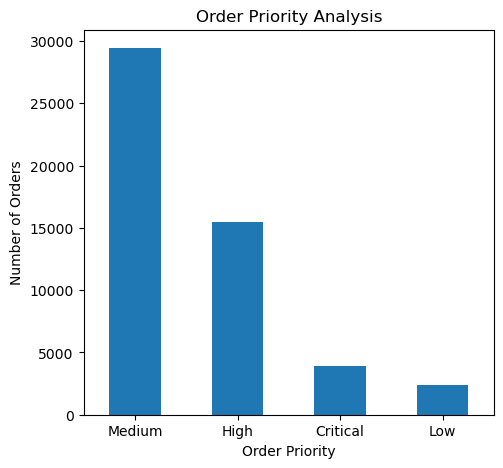

In [29]:
# Visualization
plt.figure(figsize=(18, 5))

# Order Priority Analysis Chart
plt.subplot(1, 3, 1)
order_priority_counts.plot(kind='bar')
plt.title('Order Priority Analysis')
plt.xlabel('Order Priority')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)

In [40]:
# Shipping Cost Analysis
shipping_cost_stats = data['Shipping Cost'].describe()
print(pd.DataFrame(shipping_cost_stats))

       Shipping Cost
count   51290.000000
mean       26.375818
std        57.296810
min         0.002000
25%         2.610000
50%         7.790000
75%        24.450000
max       933.570000


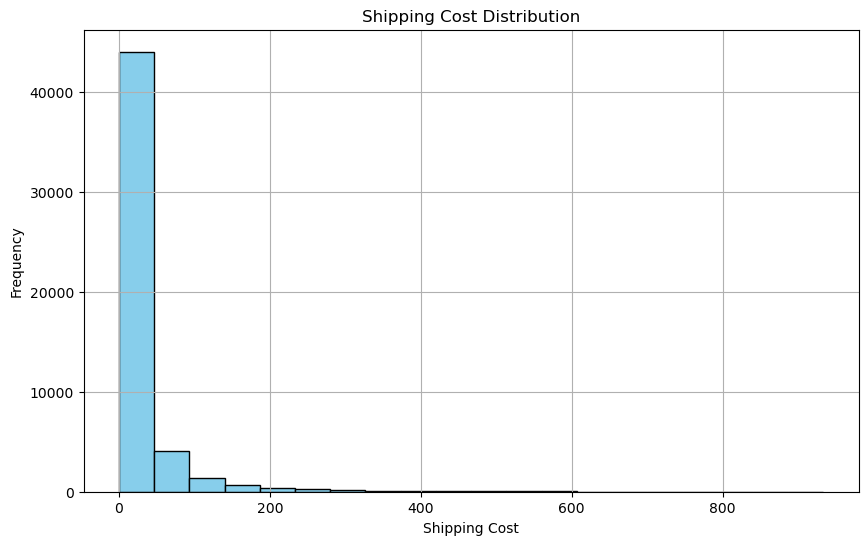

In [34]:
# Shipping Cost Analysis - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Shipping Cost'], bins=20, color='skyblue', edgecolor='black')
plt.title('Shipping Cost Distribution')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
# Geographical Analysis
geographical_counts = data.groupby(['Country', 'State', 'City']).size().reset_index(name='Count')
print(pd.DataFrame(geographical_counts))

          Country               State            City  Count
0     Afghanistan               Hirat           Herat      5
1     Afghanistan               Kabul           Kabul     41
2     Afghanistan            Kandahar        Kandahar      4
3     Afghanistan           Nangarhar       Jalalabad      5
4         Albania              Durrës          Durres      2
...           ...                 ...             ...    ...
3807     Zimbabwe              Harare         Epworth      2
3808     Zimbabwe              Harare          Harare     20
3809     Zimbabwe          Manicaland          Mutare      2
3810     Zimbabwe    Mashonaland West          Kadoma      1
3811     Zimbabwe  Matabeleland North  Victoria Falls      1

[3812 rows x 4 columns]


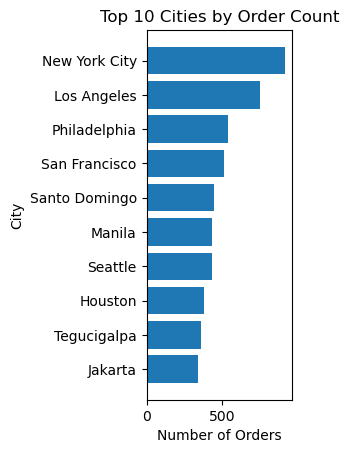

In [33]:
# Geographical Analysis Chart
plt.subplot(1, 3, 3)
top_cities = geographical_counts.sort_values(by='Count', ascending=False).head(10)
plt.barh(top_cities['City'], top_cities['Count'])
plt.title('Top 10 Cities by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.gca().invert_yaxis()